In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from fancyimpute import KNN,SoftImpute
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

%matplotlib inline


In [ ]:
#############Reading the dataset############################
data=pd.read_csv("LoansTrainingSetV2.csv",low_memory=False)
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [ ]:
###############EDA Starts here####################################

In [ ]:
data.head(5)
len(data)

111107

In [ ]:
##Drop the duplicates with respect to LOAN ID
data.drop_duplicates(subset="Loan ID",keep='first',inplace=True)

In [ ]:
##########PLotting the loan status 
status=data["Loan Status"].value_counts() 
status

Loan Given      63737
Loan Refused    25173
Name: Loan Status, dtype: int64

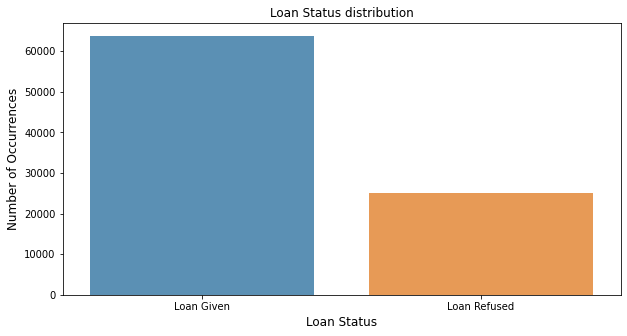

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()

In [ ]:
###########Now we will go over column by column to fix the data #################

In [ ]:
###Current Loan Amount ############
data["Current Loan Amount"].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

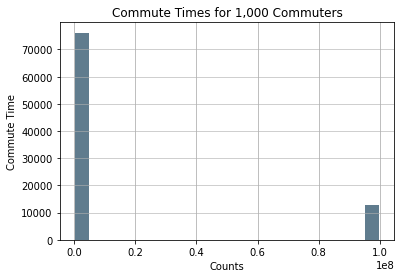

In [ ]:
###Current Loan Amount ############
data["Current Loan Amount"].describe()


data["Current Loan Amount"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [ ]:
#Finding IQR's for outlier removal

Q1 = data["Current Loan Amount"].quantile(0.25)
Q3 = data["Current Loan Amount"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

16202.0


In [ ]:
data["Current Loan Amount"][((data["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |(data["Current Loan Amount"] > (Q3 + 1.5 * IQR)))]


5044     99999999
5045     99999999
5046     99999999
5047     99999999
5048     99999999
           ...   
17777    99999999
17778    99999999
17779    99999999
17780    99999999
17781    99999999
Name: Current Loan Amount, Length: 12738, dtype: int64

In [ ]:
temp=np.array(data["Current Loan Amount"].values.tolist())
data["Current Loan Amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist()

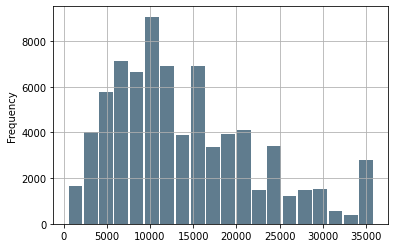

In [ ]:
temp=data["Current Loan Amount_temp"][data["Current Loan Amount_temp"]!='NaN'].astype(str).astype(int)
temp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [ ]:
temp.describe()

count    76172.000000
mean     13933.915756
std       8235.921922
min        491.000000
25%       7810.000000
50%      12038.000000
75%      19351.000000
max      35875.000000
Name: Current Loan Amount_temp, dtype: float64

In [ ]:
#Replacing the data with 50% percentile or mean
temp=np.array(data["Current Loan Amount"].values.tolist())
data["Current Loan Amount"] = np.where(temp > 9999998,12038,temp).tolist()


In [ ]:
data=data.drop(['Current Loan Amount_temp'],axis=1)

In [ ]:
###########Term ##############

In [ ]:
status=data["Term"].value_counts() 
status

Short Term    66932
Long Term     21978
Name: Term, dtype: int64

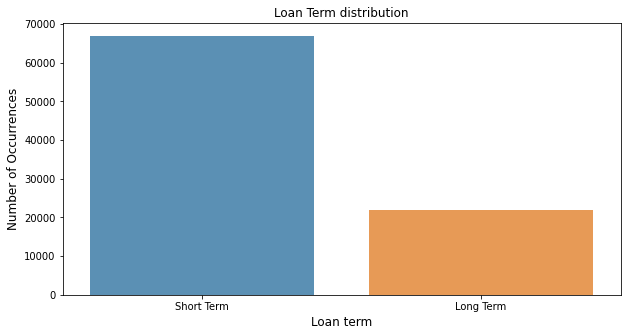

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Term distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan term', fontsize=12)
plt.show()

In [ ]:
#####Credit Score#############

In [ ]:
data["Credit Score"].describe()

count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'boxes': [<matplotlib.lines.Line2D at 0x7fd2efe1c4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd2efe1cef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2efe249b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2efe24630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd2efe1c7f0>,
  <matplotlib.lines.Line2D at 0x7fd2efe1cb70>]}

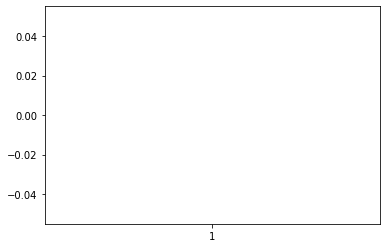

In [ ]:
##Max is 7510. It should be between 0-800
plt.boxplot(data["Credit Score"])

In [ ]:
data["Credit Score"].isnull().unique()

array([False,  True])

In [ ]:
#Shows there are missing values in the data

In [ ]:
#Now lets do treatment of the data at hand. Let us firstly divide the values greater than 800 by 10
data["Credit Score"]=np.where(data["Credit Score"]>800, data["Credit Score"]/10, data["Credit Score"])

In [ ]:
#Now lets replace the missing values with median 
median_score=statistics.median(data["Credit Score"])
data["Credit Score_1"]=data["Credit Score"]
data["Credit Score_1"].fillna(median_score, inplace = True) 


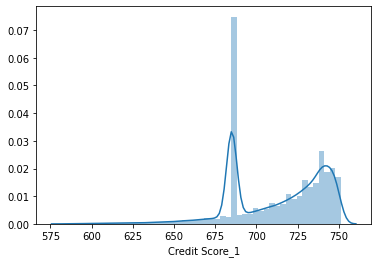

In [ ]:
sns.distplot(data["Credit Score_1"])
#As we can see this data is skewed so when we replace it with median it is giving us problems. 
#Replacing with 75th percentile and taking log we get a better distribution

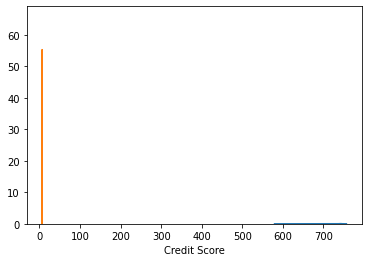

In [ ]:

data["Credit Score"].fillna(741, inplace = True) 
sns.distplot(data["Credit Score"])
sns.distplot(np.log(data["Credit Score"]))

In [ ]:
########Years in current job #######

In [ ]:
data['Home Ownership'].unique()
#As we can see it has Home Mortgage and haveMortgage as 2 different classes. Lets fix that
data['Home Ownership']=data['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)
data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

In [ ]:
##################Annual Income######################

In [ ]:
data['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [ ]:
##Lets look at the quantiles of this columns
data['Annual Income'].quantile([.2,0.75,0.90,.95,0.99,.999])


0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

In [ ]:
#As we can see they lie in the 99th percentile of the data.Lets replace them
# Capping any values greater than 99% to 99th value
data.loc[data['Annual Income'] > 239287, 'Annual Income'] = 239287

In [ ]:
data['Annual Income'].isna().sum()
#So we have about 21000 null values 

21338

In [ ]:
###############Loan Purpose ###############

In [ ]:
data['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [ ]:
#So other and Other mean the same thing. Lets make it the same
data['Purpose']=data['Purpose'].str.replace('Other', 'other', regex=True)

In [ ]:
data['Monthly Debt'].describe()
##So this is not numeric column. Lets explore

count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

In [ ]:
data['Monthly Debt'] 

0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905     567.62
88906    2508.63
88907      818.2
88908     360.17
88909     749.13
Name: Monthly Debt, Length: 88910, dtype: object

In [ ]:
# But this should be a numeric column. So lets convert it to floa
pd.to_numeric(data['Monthly Debt'])

ValueError: ignored

In [ ]:
#As we can see there is a $ symbol present. Lets replace it 
data['Monthly Debt']=data['Monthly Debt'].str.replace('$', '', regex=True)
data['Monthly Debt']=pd.to_numeric(data['Monthly Debt'] )

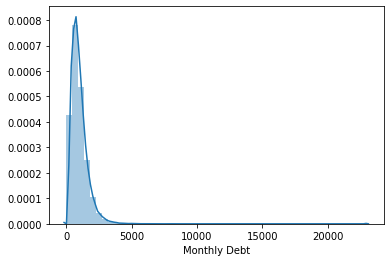

In [ ]:
sns.distplot(data["Monthly Debt"])

In [ ]:
#We can see that there are outliers in this data because of the plot
#Lets explore
data['Monthly Debt'].describe()
#The max value is too high here


count    88910.000000
mean       963.102059
std        637.524064
min          0.000000
25%        532.220000
50%        843.925000
75%       1250.527500
max      22939.120000
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([.2,0.75,0.90,.95,0.99,.999])
#Problem is with 99th percentile. lets dig deeper

0.200     463.75000
0.750    1250.52750
0.900    1743.08300
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([0.9995,.9999])
#So problem again is wit 99th percentile

0.9995    5482.111455
0.9999    7774.610660
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([0.9997,.99999])
#0.99970     5978.574911
#0.99999    13262.762330

0.99970     5978.574911
0.99999    13262.762330
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([0.999,1])
#0.999     4926.37475
#1.000    22939.12000
#Need to replace this

0.999     4926.37475
1.000    22939.12000
Name: Monthly Debt, dtype: float64

In [ ]:
data.loc[data['Monthly Debt'] > 4926, 'Monthly Debt'] = 4926

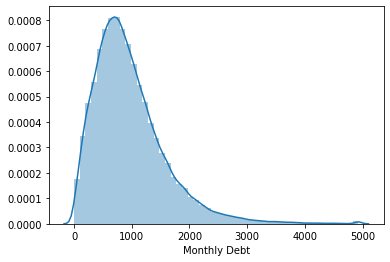

In [ ]:
sns.distplot(data["Monthly Debt"])
#Now we get the right distribution


In [ ]:
####################Years of credit history #################

In [ ]:
data['Years of Credit History'].value_counts()

16.0    1234
15.0    1159
17.0    1091
16.5    1045
14.0    1031
        ... 
56.1       1
54.2       1
49.8       1
49.7       1
3.6        1
Name: Years of Credit History, Length: 508, dtype: int64

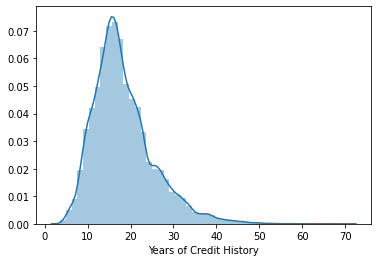

In [ ]:
sns.distplot(data["Years of Credit History"])
#Over all looks pretty clean! no need of doing anything

In [ ]:
#############Months since last delinquent####################

In [ ]:
#Lets check if there are any NA's
data['Months since last delinquent'].isna().sum()
#We have nearly 48506 NA;s. We will try to handle them at last 

48506

In [ ]:
data['Number of Open Accounts'].describe()
#The max number seems odd. Lets investigate

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

In [ ]:
data['Number of Open Accounts'].quantile([0.75,0.999,1])
#Ok so replacing anything greater than 99th percentile with 99th percentile values

0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

In [ ]:
data.loc[data['Number of Open Accounts'] > 36, 'Number of Open Accounts'] = 36

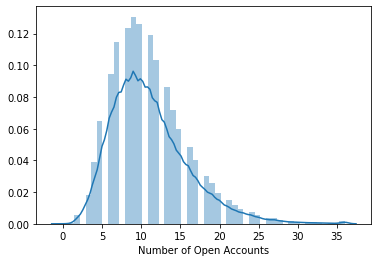

In [ ]:
sns.distplot(data['Number of Open Accounts'])
#Looks good now

In [ ]:
#######################Number of Credit problems##############

In [ ]:
data['Number of Credit Problems'].describe() 
#Max looks a bit higher. Lets see

count    88910.000000
mean         0.160477
std          0.473746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number of Credit Problems, dtype: float64

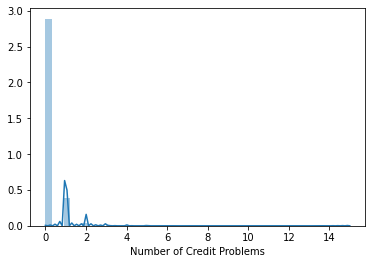

In [ ]:
sns.distplot(data['Number of Credit Problems'])
#Okay lets look at value _counts

In [ ]:
data['Number of Credit Problems'].value_counts()
#Okay looks good


0     77057
1     10271
2      1092
3       311
4       101
5        46
6        14
7         6
9         4
10        3
8         2
15        1
12        1
11        1
Name: Number of Credit Problems, dtype: int64

In [ ]:
##################Current Credit Balance###########

In [ ]:
data['Current Credit Balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

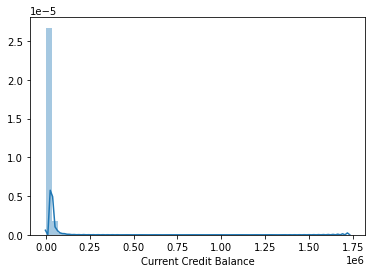

In [ ]:
sns.distplot(data['Current Credit Balance'])
#It seems there are outliers in this data. Lets investigate

In [ ]:
data['Current Credit Balance'].quantile([0.75,0.95,0.999,1])

0.750      19301.000
0.950      39933.300
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

In [ ]:
#lets dig deeper
data['Current Credit Balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

In [ ]:
#So lets replace it with 95th percentile

data['Current Credit Balance'].quantile([0.55,0.76,0.87,0.98,0.99,1])

data.loc[data['Current Credit Balance'] > 81007, 'Current Credit Balance'] = 81007


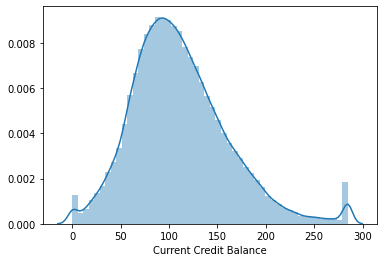

In [ ]:
sns.distplot(data['Current Credit Balance']**(1/2))
#The plot doesnt look good. We need to transform it

In [ ]:
data['Current Credit Balance']=data['Current Credit Balance']**(1/2)

In [ ]:
#######################Max open credit################

In [ ]:
data['Maximum Open Credit'].describe()

count     88910
unique    46625
top           0
freq        610
Name: Maximum Open Credit, dtype: object

In [ ]:
data['Maximum Open Credit'].value_counts()

0        610
10782     10
11044     10
14382     10
17464     10
        ... 
21452      1
1583       1
23326      1
29187      1
35350      1
Name: Maximum Open Credit, Length: 46625, dtype: int64

ValueError: ignored

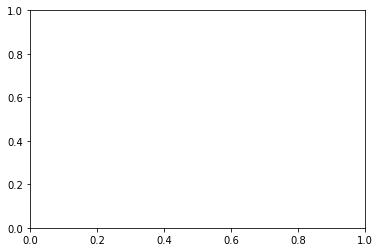

In [ ]:
sns.distplot(data['Maximum Open Credit'])
#So there are some str characters present in the data. Lets find them


In [ ]:
#Lets replace #value with Nan
data['Maximum Open Credit']=data['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)
data['Maximum Open Credit']=pd.to_numeric(data['Maximum Open Credit'])


In [ ]:
data['Maximum Open Credit'].isnull().sum()
#Now we have only 2 Nan;s in the data. Lets replace them with mean  

2

In [ ]:
data['Maximum Open Credit']=data['Maximum Open Credit'].fillna(35965)

In [ ]:
data['Maximum Open Credit'].quantile([0.55,0.76,0.87,0.98,0.99,1])
#Lets replace the outliers

0.55       24037.95
0.76       37259.84
0.87       50736.66
0.98      114682.56
0.99      171423.91
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [ ]:
data.loc[data['Maximum Open Credit'] > 171423, 'Maximum Open Credit'] = 171423

In [ ]:
###############Bankruptcies##########

In [ ]:
data['Bankruptcies'].describe()

count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [ ]:
data['Bankruptcies'].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0      272
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [ ]:
data['Bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [ ]:
#So we have Nan's. Lets fill them with median
data['Bankruptcies']=data['Bankruptcies'].fillna(3)

In [ ]:
####Tax Liens######

In [ ]:
data['Tax Liens'].describe()

count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [ ]:
data['Tax Liens'].value_counts()

0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
11.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [ ]:
data['Bankruptcies'].unique()

array([0., 1., 3., 2., 4., 5., 7., 6.])

In [ ]:
################Now we will impute missing values to the columns which have NA's ####################

###Converting all the categorical columns into numbers

In [ ]:
###Converting all the categorical columns into numbers
cat_cols = ['Term','Years in current job','Home Ownership','Purpose']

for c in cat_cols:
    data[c] = pd.factorize(data[c])[0]


In [ ]:
#Imputing missing data with soft impute
updated_data=pd.DataFrame(data=SoftImpute().fit_transform(data[data.columns[3:19]],), columns=data[data.columns[3:19]].columns, index=data.index)

[SoftImpute] Max Singular Value of X_init = 23093178.732064
[SoftImpute] Iter 1: observed MAE=260.284757 rank=3
[SoftImpute] Iter 2: observed MAE=260.241156 rank=3
[SoftImpute] Iter 3: observed MAE=260.246987 rank=3
[SoftImpute] Iter 4: observed MAE=260.265507 rank=3
[SoftImpute] Iter 5: observed MAE=260.286889 rank=3
[SoftImpute] Iter 6: observed MAE=260.308362 rank=3
[SoftImpute] Iter 7: observed MAE=260.329046 rank=3
[SoftImpute] Iter 8: observed MAE=260.348584 rank=3
[SoftImpute] Iter 9: observed MAE=260.366980 rank=3
[SoftImpute] Iter 10: observed MAE=260.384092 rank=3
[SoftImpute] Iter 11: observed MAE=260.400008 rank=3
[SoftImpute] Iter 12: observed MAE=260.414651 rank=3
[SoftImpute] Iter 13: observed MAE=260.428125 rank=3
[SoftImpute] Iter 14: observed MAE=260.440400 rank=3
[SoftImpute] Iter 15: observed MAE=260.451533 rank=3
[SoftImpute] Iter 16: observed MAE=260.461542 rank=3
[SoftImpute] Iter 17: observed MAE=260.470552 rank=3
[SoftImpute] Iter 18: observed MAE=260.478698 ra

In [ ]:
#Getting the dataset ready pd.get dummies function for dropping the dummy variables
df_LC = pd.get_dummies(updated_data, drop_first=True)
#df_LC['Loan_Status']=data['Loan Status']

In [ ]:
#Binarizing the Target variable
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data['Loan Status'])
y=lb_results
y=y.ravel()


In [ ]:
#Scaling the independent variables
X_scaled = preprocessing.scale(df_LC)
print(X_scaled)
print('   ')
print(X_scaled.shape)


[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10958408]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10958408]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10958408]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10958408]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10958408]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.77361205]]
   
(88910, 16)


In [ ]:
#######Looking at other models using different classifiers
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

In [ ]:
################NowFunctions####################

In [ ]:

def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]

In [ ]:

#Function to find which features are more important than others through model
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(df_LC.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

In [ ]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix



In [ ]:
#Finding accuracy and feature importance using XGB classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)

In [ ]:
#Finding accuracy and feature importance using XGB classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.7313762981291944
Area under the ROC curve:  0.7471533888487936
F-metric:  0.318851601863295
 
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83     18981
           1       0.59      0.22      0.32      7692

    accuracy                           0.73     26673
   macro avg       0.67      0.58      0.58     26673
weighted avg       0.70      0.73      0.68     26673

 
Evaluation by cross-validation:
[0.74027956 0.74100257 0.73929461 0.73760746 0.73391179]


[0.25810808 0.22253321 0.21026482 0.02755453 0.04981292 0.05325364
 0.0186639  0.02236626 0.01466306 0.01534298 0.01570477 0.00969497
 0.02374542 0.02349943 0.01785571 0.01693625]


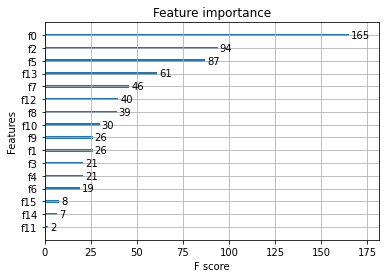

In [ ]:
print(xgb0.feature_importances_)
plot_importance(xgb0)
pyplot.show()


In [ ]:

#######K nearest Neighbour classifier ################

knc, y_p, y_p2 = classify(KNeighborsClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.6827878378885015
Area under the ROC curve:  0.6084508845819299
F-metric:  0.3150651663563507
 
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     18981
           1       0.42      0.25      0.32      7692

    accuracy                           0.68     26673
   macro avg       0.58      0.55      0.55     26673
weighted avg       0.65      0.68      0.66     26673

 
Evaluation by cross-validation:
[0.69127571 0.69320373 0.69639271 0.69036716 0.68876034]


In [ ]:
########Logistic Regression ##############
logit, y_p, y_p2 = classify(LogisticRegression(), X_train, y_train,X_test,y_test)

Accuracy:  0.7199040227945863
Area under the ROC curve:  0.6738582055794744
F-metric:  0.21233526620980497
 
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     18981
           1       0.56      0.13      0.21      7692

    accuracy                           0.72     26673
   macro avg       0.65      0.54      0.52     26673
weighted avg       0.68      0.72      0.65     26673

 
Evaluation by cross-validation:
[0.72646208 0.72983612 0.72684181 0.72876998 0.72627942]


In [ ]:
########Decision Tree Classifier ##########
dtc, y_p, y_p2 = classify(DecisionTreeClassifier(), X_train, y_train,X_test,y_test)


Accuracy:  0.648558467364001
Area under the ROC curve:  0.5771637266628645
F-metric:  0.40132839443096174
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     18981
           1       0.39      0.41      0.40      7692

    accuracy                           0.65     26673
   macro avg       0.58      0.58      0.58     26673
weighted avg       0.65      0.65      0.65     26673

 
Evaluation by cross-validation:
[0.65849936 0.65488432 0.65204467 0.65445489 0.65228569]


In [ ]:
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(n_estimators=47, learning_rate=0.015), X_train, y_train,X_test,y_test)

Accuracy:  0.7215911221084992
Area under the ROC curve:  0.7215575114759502
F-metric:  0.2509582408714948
 
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     18981
           1       0.56      0.16      0.25      7692

    accuracy                           0.72     26673
   macro avg       0.65      0.56      0.54     26673
weighted avg       0.69      0.72      0.66     26673

 
Evaluation by cross-validation:
[0.7314428  0.73264781 0.73262634 0.72893067 0.72965373]


computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
computing XGBClassifier - Non-balanced 


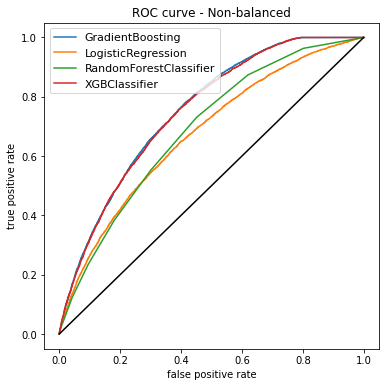

In [ ]:
#########Running on unbalanced dataset #############
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
computing XGBClassifier - Balanced 


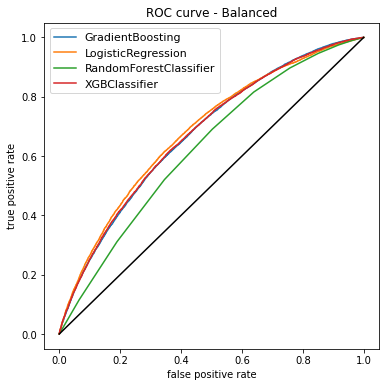

In [ ]:
##########Synthetically balancing the dataset##################
index_split = int(len(X_scaled)/2)
X_train, y_train = SMOTE().fit_sample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]

models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')


In [ ]:

################Now we  know that GBM model performed the best so 
# save model
gbm=GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3)
gbm.fit(X_scaled, y)
joblib.dump(gbm, 'GBM_Model_version1.pkl')
# load model
#gbm_pickle = joblib.load('GBM_Model_version1.pkl')

['GBM_Model_version1.pkl']